In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Thyroid_Disease.csv')
df.head()

,Unnamed: 0,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,0,27,1,False,False,False,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,False
1,1,34,1,False,True,False,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,False
2,2,30,1,False,False,False,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,False
3,3,62,1,False,False,False,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,False
4,4,62,1,False,False,False,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Unnamed: 0                           383 non-null    int64 
 1   Age                                  383 non-null    int64 
 2   Gender                               383 non-null    int64 
 3   Smoking                              383 non-null    bool  
 4   Smoking History                      383 non-null    bool  
 5   Radiotherapy History                 383 non-null    bool  
 6   Thyroid Function                     383 non-null    object
 7   Physical Examination                 383 non-null    object
 8   Adenopathy                           383 non-null    object
 9   Types of Thyroid Cancer (Pathology)  383 non-null    object
 10  Focality                             383 non-null    object
 11  Risk                                 383 non-

In [9]:
for column in df.columns:
    unique_columns = df[column].value_counts()
    print("**************************************")
    print(f"Unique Values in {column} is: ")
    print(unique_columns)
    print("**************************************")

**************************************
Unique Values in Unnamed: 0 is: 
Unnamed: 0
0      1
252    1
261    1
260    1
259    1
      ..
125    1
124    1
123    1
122    1
382    1
Name: count, Length: 383, dtype: int64
**************************************
**************************************
Unique Values in Age is: 
Age
31    22
27    13
40    12
26    12
28    12
      ..
79     1
18     1
69     1
76     1
78     1
Name: count, Length: 65, dtype: int64
**************************************
**************************************
Unique Values in Gender is: 
Gender
1    312
0     71
Name: count, dtype: int64
**************************************
**************************************
Unique Values in Smoking is: 
Smoking
False    334
True      49
Name: count, dtype: int64
**************************************
**************************************
Unique Values in Smoking History is: 
Smoking History
False    355
True      28
Name: count, dtype: int64
************************

In [11]:
df.isnull().sum()

Unnamed: 0                             0
Age                                    0
Gender                                 0
Smoking                                0
Smoking History                        0
Radiotherapy History                   0
Thyroid Function                       0
Physical Examination                   0
Adenopathy                             0
Types of Thyroid Cancer (Pathology)    0
Focality                               0
Risk                                   0
Tumor                                  0
Lymph Nodes                            0
Cancer Metastasis                      0
Stage                                  0
Treatment Response                     0
Recurred                               0
dtype: int64

In [13]:
df.duplicated().sum()

0

## Data Preprocessing

In [18]:
def Convert_dtype(df, column_name):
    # Dictionary for conversion
    dict_ = {
        'Yes': True,
        'No': False
    }
    df[column_name] = df[column_name].apply(lambda x: dict_.get(x, x))
    
Convert_dtype(df, 'Smoking')
Convert_dtype(df, 'Recurred')

In [20]:
def Convert_Gender(df, column_name):
    # Dictionary for conversion
    dict_ = {
        'F': 1,
        'M': 0
    }
    df[column_name] = df[column_name].apply(lambda x: dict_.get(x, x)).astype(int)
    
Convert_Gender(df, 'Gender')

In [22]:
# Rename the columns for better understanding
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [26]:
df.describe(include='all')

,Unnamed: 0,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
count,383.00000,383.000000,383.000000,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,NaN,NaN,NaN,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,NaN,NaN,NaN,False,False,False,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,False
freq,NaN,NaN,NaN,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275
mean,191.00000,40.866841,0.814621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,110.70682,15.134494,0.389113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.00000,15.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,95.50000,29.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,191.00000,37.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,286.50000,51.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Visualization
# 1.  Age Distribution 
To visualize the age distribution of patients in the dataset.

C:\Users\moham\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


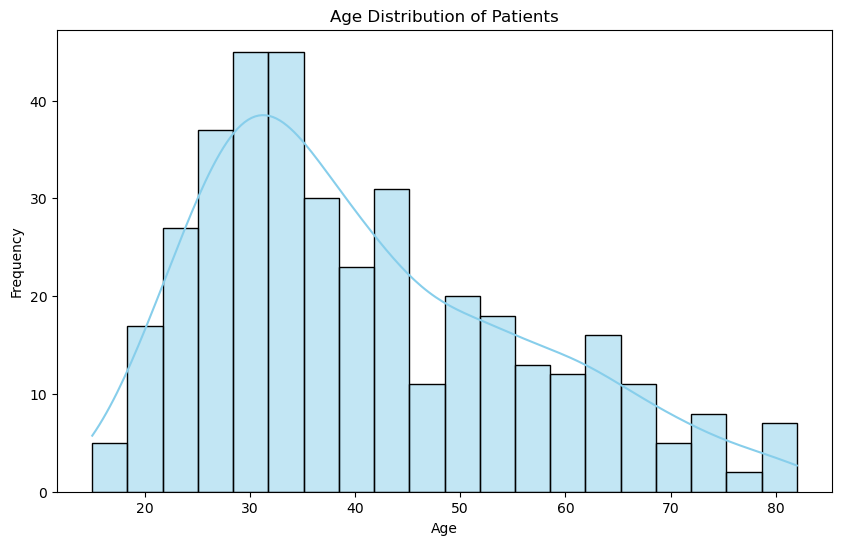

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## 2. Gender Distribution
To visualize the distribution of patients by gender.

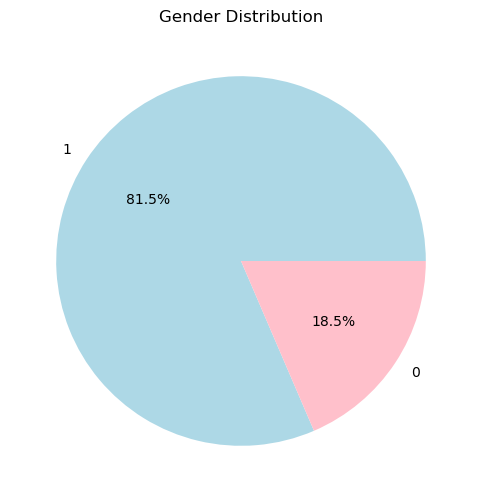

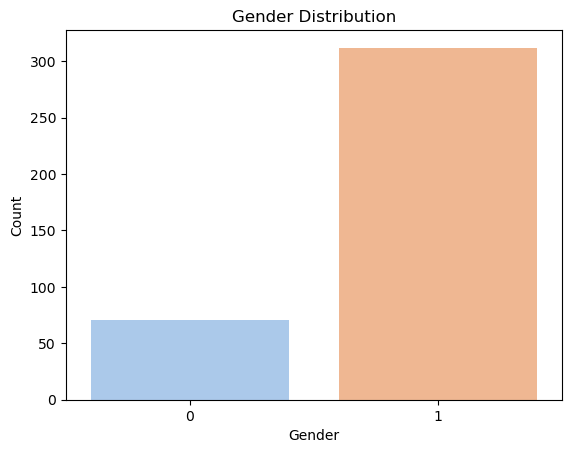

In [38]:
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

# Bar plot alternative
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## 3. Smoking Status Impact
To compare the distribution of thyroid function status among smokers and non-smokers.

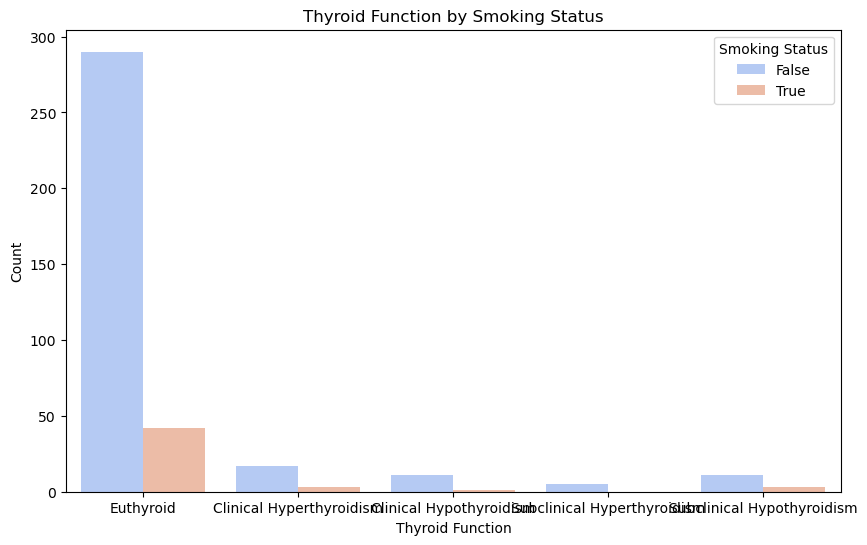

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Thyroid Function', hue='Smoking', data=df, palette='coolwarm')
plt.title('Thyroid Function by Smoking Status')
plt.xlabel('Thyroid Function')
plt.ylabel('Count')
plt.legend(title='Smoking Status')
plt.show()

## 4. Thyroid Function and Age
To explore the relationship between age and thyroid function status.

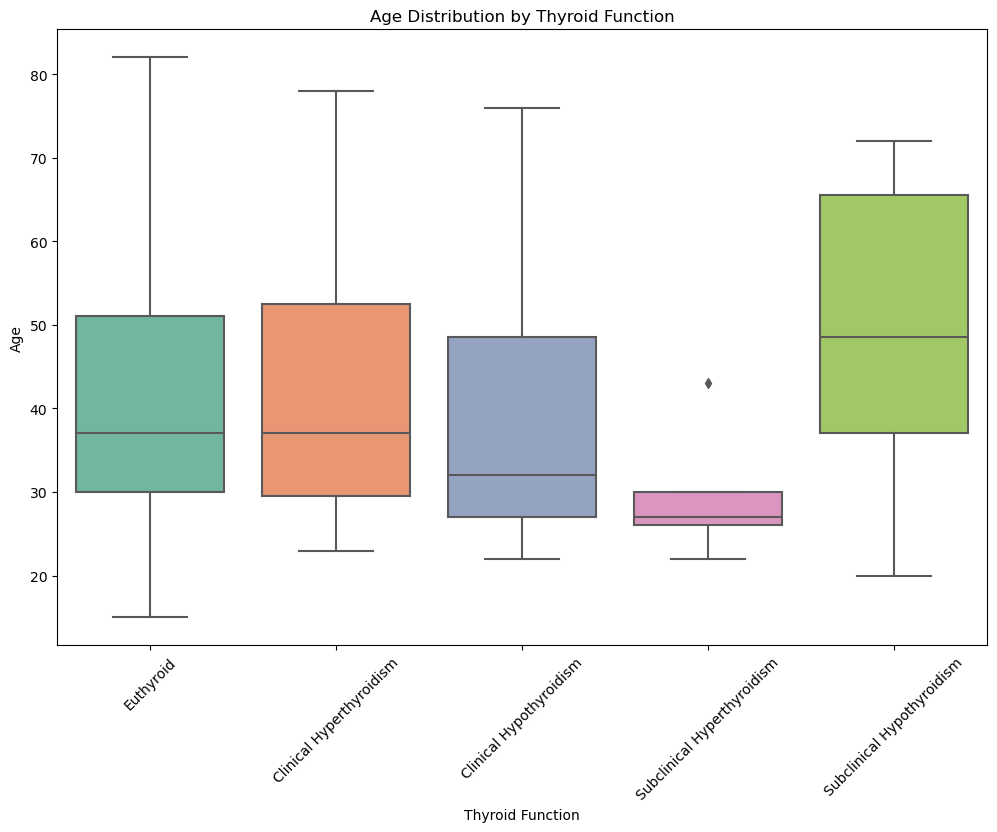

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Thyroid Function', y='Age', data=df, palette='Set2')
plt.title('Age Distribution by Thyroid Function')
plt.xlabel('Thyroid Function')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

## 5. Physical Examination Findings
To visualize the frequency of different physical examination findings.

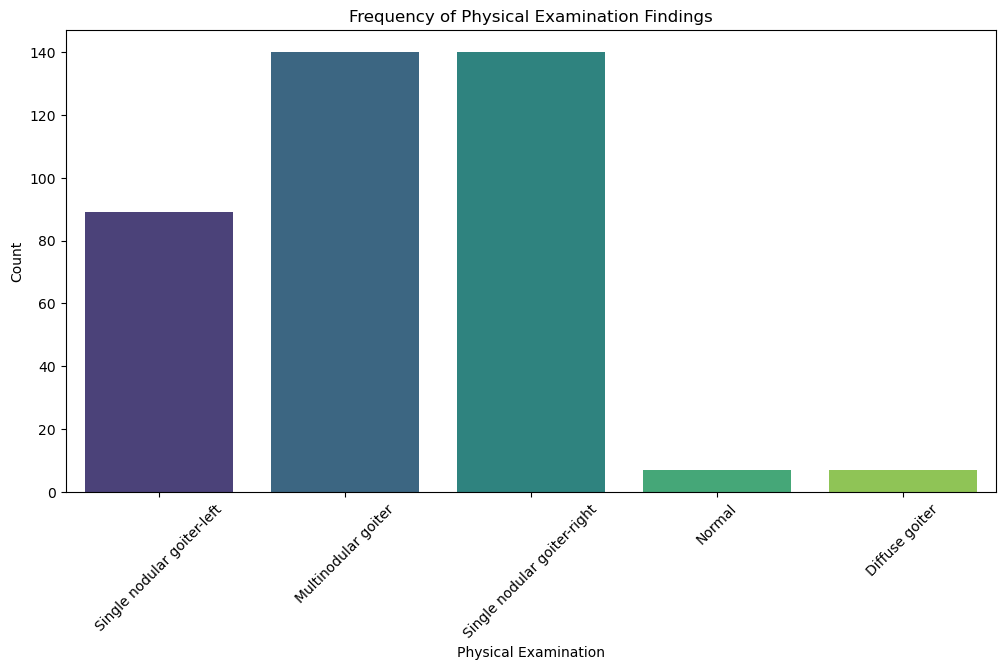

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Physical Examination', data=df, palette='viridis')
plt.title('Frequency of Physical Examination Findings')
plt.xlabel('Physical Examination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## 6. Adenopathy and Thyroid Cancer Types
To investigate the relationship between adenopathy and types of thyroid cancer.

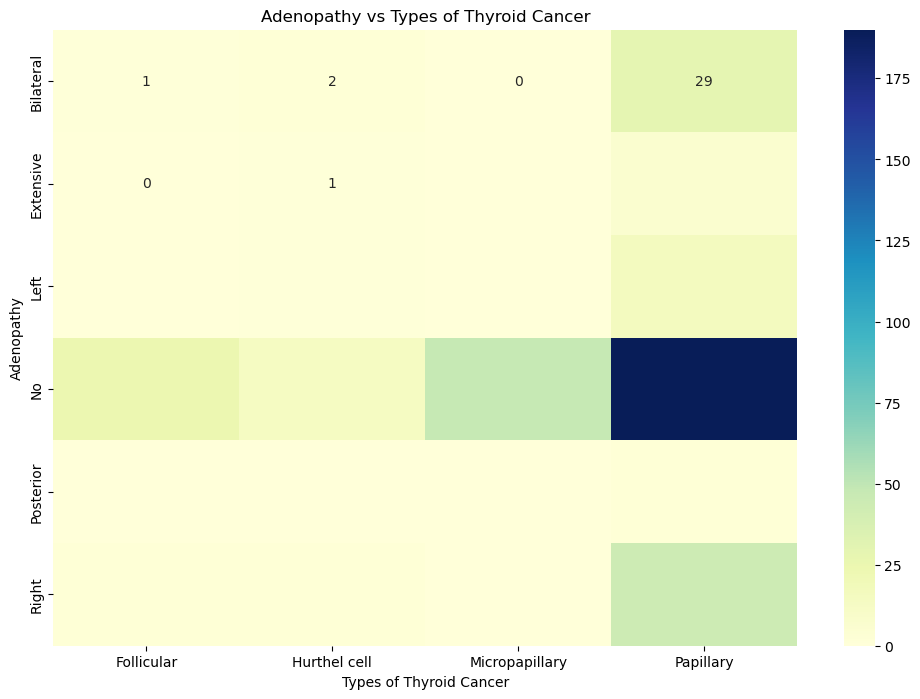

In [50]:
plt.figure(figsize=(12, 8))
heatmap_data = pd.crosstab(df['Adenopathy'], df['Types of Thyroid Cancer (Pathology)'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Adenopathy vs Types of Thyroid Cancer')
plt.xlabel('Types of Thyroid Cancer')
plt.ylabel('Adenopathy')
plt.show()

## 7. Cancer Stage Distribution
To visualize the distribution of different cancer stages.

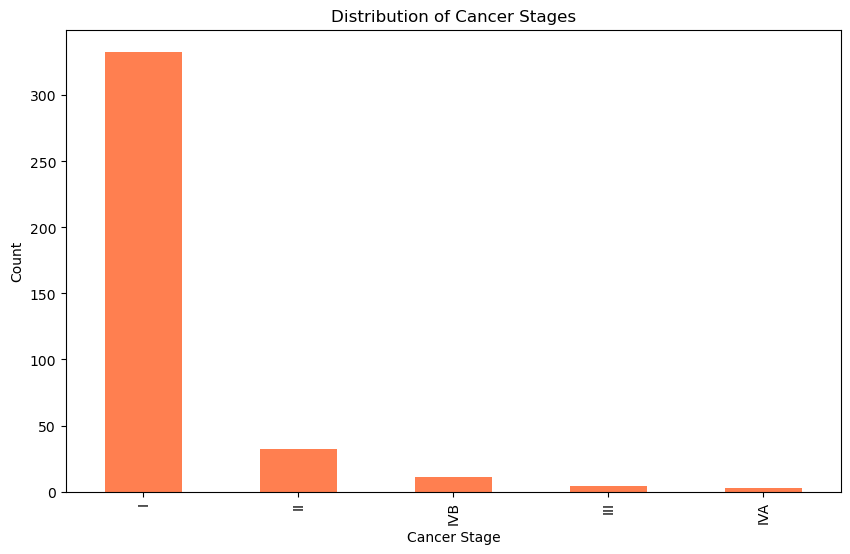

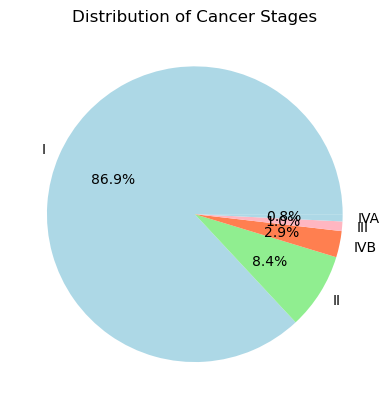

In [53]:
plt.figure(figsize=(10, 6))
df['Stage'].value_counts().plot(kind='bar', color='coral')
plt.title('Distribution of Cancer Stages')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.show()

# Pie chart alternative
df['Stage'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'coral', 'lightpink'])
plt.title('Distribution of Cancer Stages')
plt.ylabel('')
plt.show()

## 8. Treatment Response Analysis
To analyze the distribution of treatment responses across different cancer stages.

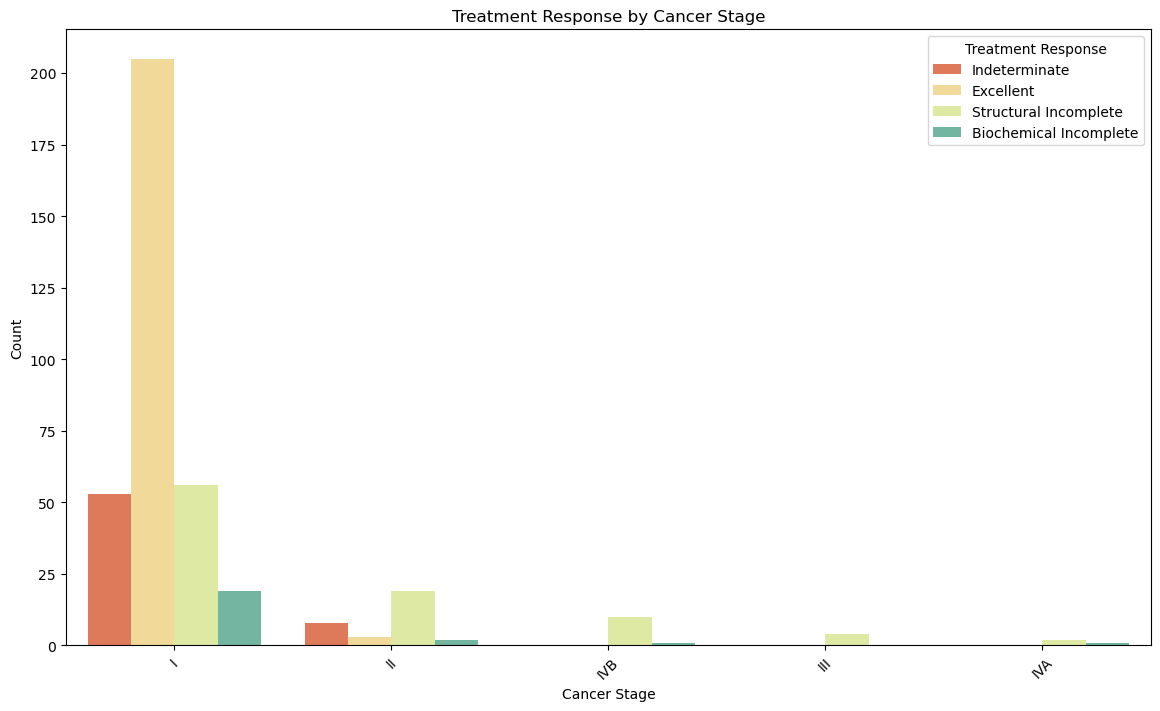

In [56]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Stage', hue='Treatment Response', data=df, palette='Spectral')
plt.title('Treatment Response by Cancer Stage')
plt.xlabel('Cancer Stage')
plt.ylabel('Count')
plt.legend(title='Treatment Response')
plt.xticks(rotation=45)
plt.show()

## 9. Recurrence Analysis
To visualize the proportion of patients who experienced recurrence versus those who did not.

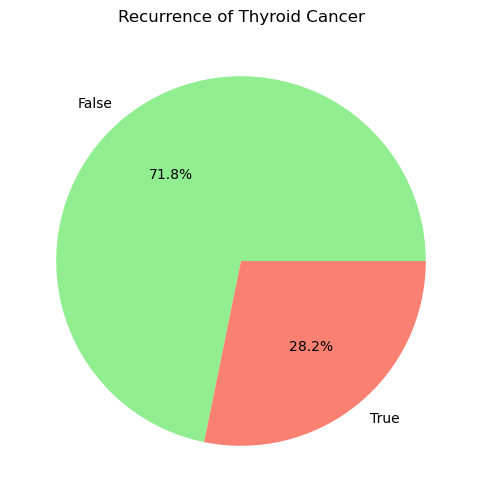

In [59]:
plt.figure(figsize=(8, 6))
df['Recurred'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title('Recurrence of Thyroid Cancer')
plt.ylabel('')
plt.show()

## 10. Risk Distribution by Cancer Type
To investigate the distribution of risk levels across different types of thyroid cancer.

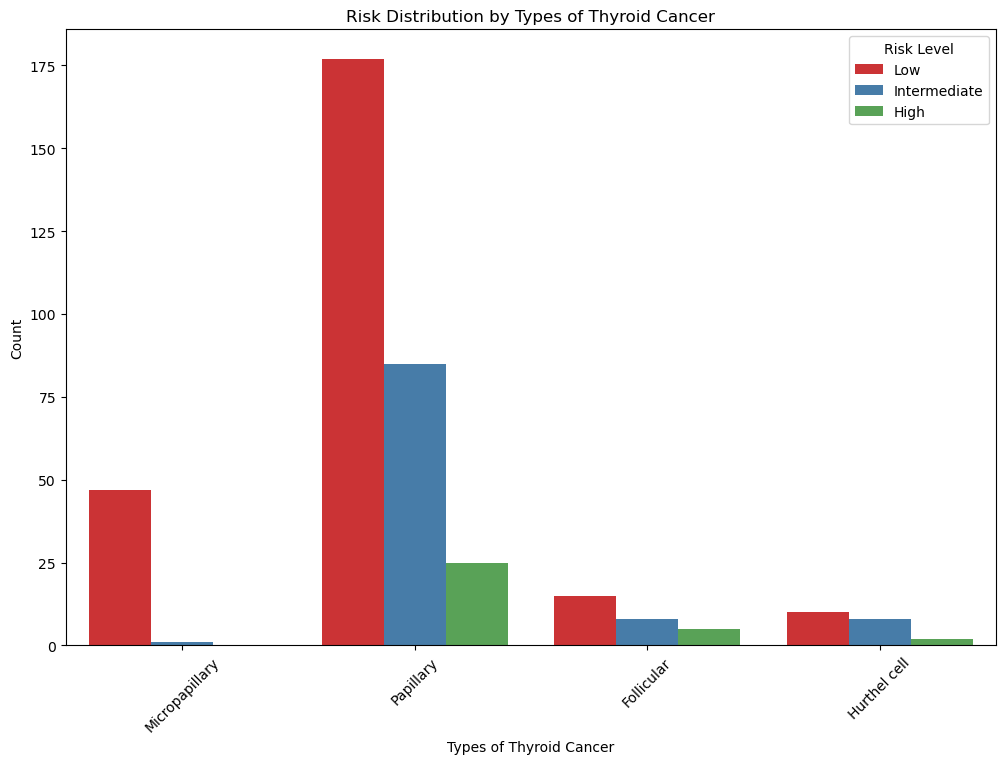

In [62]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Types of Thyroid Cancer (Pathology)', hue='Risk', data=df, palette='Set1')
plt.title('Risk Distribution by Types of Thyroid Cancer')
plt.xlabel('Types of Thyroid Cancer')
plt.ylabel('Count')
plt.legend(title='Risk Level')
plt.xticks(rotation=45)
plt.show()